load libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

clustering_data = pd.read_csv("clustering_data.csv")

# flat clustering - k-means with 2 clusters

In [2]:
# initialize k-means
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state=1337)

# fit
kmeans.fit(clustering_data)

KMeans(n_clusters=2, n_init='auto')

In [3]:
kmeans.predict(clustering_data)

array([0, 0, 0, ..., 1, 1, 1])

### vizualize

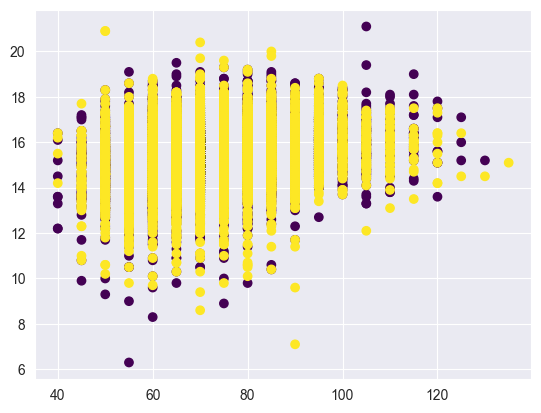

In [4]:
plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = kmeans.labels_, cmap = 'viridis')
plt.show()

### elbow visualiser

In [5]:
from yellowbrick.cluster import KElbowVisualizer

clusters = KMeans(max_iter = 500, n_init="auto")
visual = KElbowVisualizer(clusters, k = (2, 20))
visual.fit(clustering_data)
visual.show()

In [ ]:
kmeans_optim = KMeans(n_clusters = 7, n_init = 'auto', random_state=1337)

# fit
kmeans_optim.fit(clustering_data)

plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = kmeans_optim.labels_, cmap = 'viridis')
plt.show()

# hierarchical clustering - trvá to fakt dlouho tbh

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(clustering_data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

### clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#initialize clusters
clusters = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

#assign data to clusters
predictions = clusters.fit_predict(clustering_data)
clustering_data['predictions'] = predictions
clustering_data


In [ ]:
plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = clustering_data['predictions'], cmap = 'viridis')
plt.show()